In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
sns.set()

# Best Genre of Movie to Produce for a Startup Movie Studio

In [2]:
# load data frame for first analysis
movie_genre_by_year_df = pd.read_csv('movie_genre_by_year_df.csv')

In [3]:
# we want the top 9 genres by total movies produced and then we want to add animation
col_sum = movie_genre_by_year_df.apply(lambda x: x.sum(), axis = 0)
keep1 = list(col_sum[1:].sort_values().tail(9).index)
keep1.insert(0,'Animation') #want to keep animation because it's unique becuase allthough there is a small amount of animated movies the generate a lot of revenue

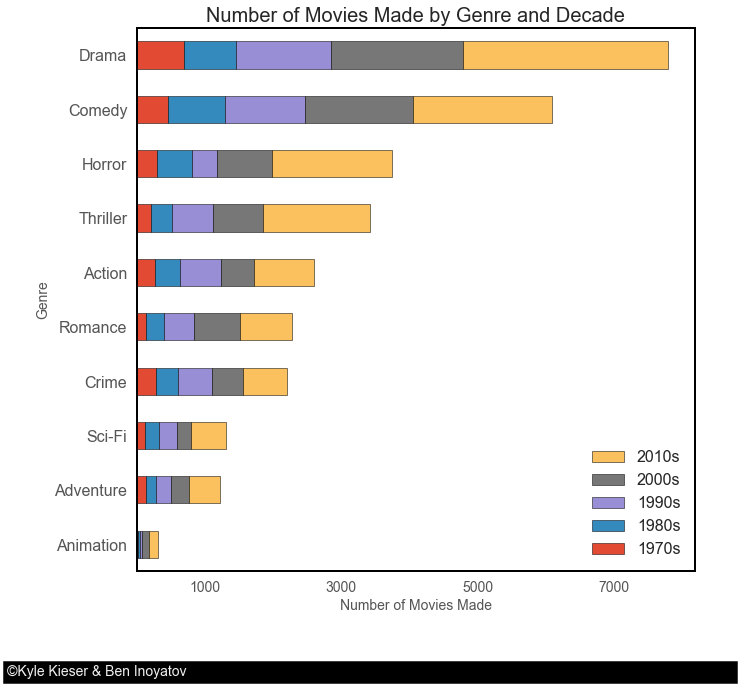

In [4]:
# graphing and formating
style.use('ggplot')
fig, ax = plt.subplots()
movie_genre_by_year_df[keep1].T.plot(kind='barh', stacked=True, figsize = (10,10), edgecolor = 'black', ax=ax)
ax.set_title('Number of Movies Made by Genre and Decade', fontsize = 20)
ax.set_xlabel('Number of Movies Made', fontsize = 14)
ax.set_ylabel('Genre', fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles),['2010s', '2000s', '1990s', '1980s', '1970s'], prop={'size': 16},
          title_fontsize = 'xx-large', facecolor = 'white', edgecolor = 'white', loc = 'lower right')
ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks([1000,3000,5000,7000])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=16)
for i in ['left','right', 'top', 'bottom']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
fig.text(x = -0.055, y = -0.02,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                             ',
         fontsize = 14, color = '#f0f0f0', backgroundcolor = 'black');
# plt.savefig('graph_pngs/num_movies_genre.png', facecolor='w', bbox_inches = 'tight')

### You can see that movie production is growing yearly. A majority of films have come in the last decade. Animation makes up a small portion of the total movies made. This is interesting because they seem to make alot of money. We will investigate this further in the next graph

In [17]:
# load dataframe for the second analysis and order the data by total revenue
bud_rev_genre_by_year_df = pd.read_csv('bud_rev_genre_by_year_df.csv')
keep2 = bud_rev_genre_by_year_df.iloc[:,1:].apply(sum).sort_values().index

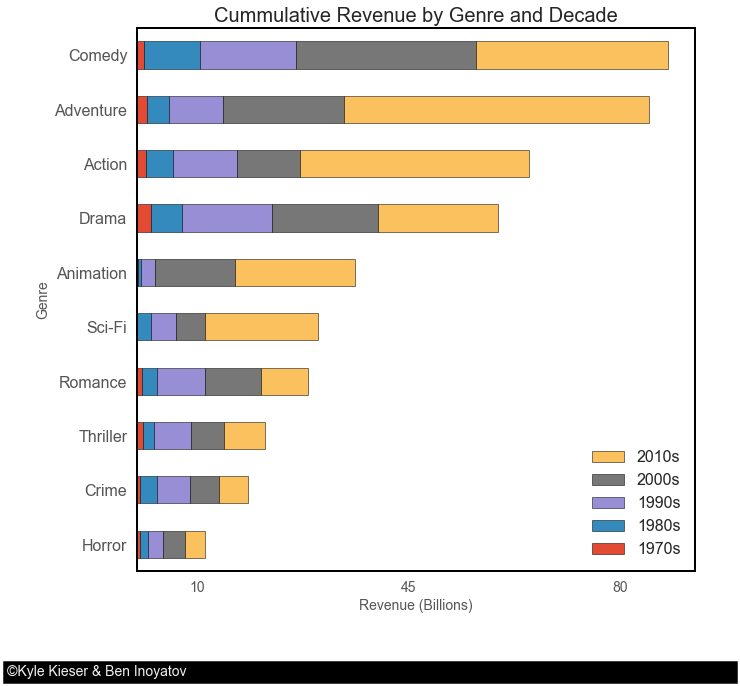

In [20]:
# graphing and formatting
style.use('ggplot')
fig, ax = plt.subplots()
bud_rev_genre_by_year_df[keep2].T.plot(kind='barh', stacked=True, figsize = (10,10), edgecolor = 'black', ax=ax)
ax.set_title('Cummulative Revenue by Genre and Decade', fontsize = 20)
ax.set_xlabel('Revenue (Billions)', fontsize = 14)
ax.set_ylabel('Genre', fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles),['2010s', '2000s', '1990s', '1980s', '1970s'], prop={'size': 16},
          title_fontsize = 'xx-large', facecolor = 'white', edgecolor = 'white', loc = 'lower right')
ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks(np.linspace(1e10, 8e10, num = 3))
ax.set_xticklabels([10,45,80])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=16)
for i in ['left','right', 'top', 'bottom']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
fig.text(x = -0.055, y = -0.02,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                             ',
         fontsize = 14, color = '#f0f0f0', backgroundcolor = 'black');
# plt.savefig('graph_pngs/cum_rev_genre.png', facecolor='w', bbox_inches = 'tight')

### We can see that the highest grossing genre in the last 50 years is comedy. Additionally, animation is in the top 5 for revenue despite there being significantly less animated movies. This leads us to believe that it might be one of the top genres for average revenue. Let's check it out.

In [9]:
# load dataframe
bud_rev_by_genre_df = pd.read_csv('bud_rev_by_genre_df.csv').set_index('genre')

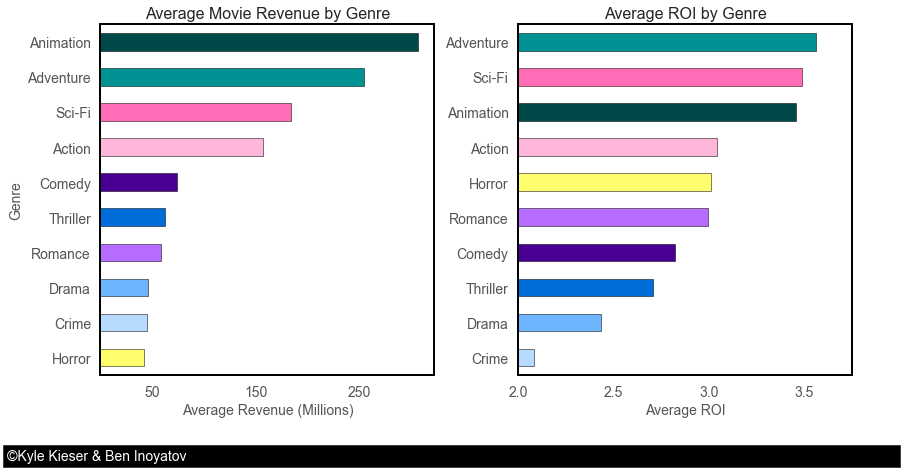

In [10]:
# graphing and formatting
c1 = ["#ffff6d", #horror
      "#b6dbff", #crime
      "#6db6ff", #drama
      "#b66dff", #romance
      "#006ddb", #thriller
      "#490092", #comedy
      "#ffb6db", #action
      "#ff6db6", #sci-fi
      "#009292", #adventure
      "#004949"] #animation

c2 = ["#b6dbff", #crime
      "#6db6ff", #drama
      "#006ddb", #thriller
      "#490092", #comedy
      "#b66dff", #romance
      "#ffff6d", #horror
      "#ffb6db", #action  
      "#004949", #animation
      "#ff6db6", #sci-fi
      "#009292"] #adventure

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
bud_rev_by_genre_df['avg_gross'].loc[keep1].sort_values().plot(kind = 'barh', ax=axes[0], color = c1, edgecolor = 'black')
axes[0].set_title('Average Movie Revenue by Genre', fontsize = 16)
axes[0].set_xlabel('Average Revenue (Millions)', fontsize = 14)
axes[0].set_ylabel('Genre', fontsize = 14)
axes[0].grid(False)
axes[0].set_facecolor('white')
axes[0].set_xticks(np.linspace(0.5e8, 2.5e8, num = 3))
axes[0].set_xticklabels([50, 150, 250])
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
for i in ['left','right', 'top', 'bottom']:
    axes[0].spines[i].set_color('black')
    axes[0].spines[i].set_linewidth(2)
    
bud_rev_by_genre_df['avg_roi'].loc[keep1].sort_values().plot(kind = 'barh', ax=axes[1], color = c2, edgecolor = 'black')
axes[1].set_title('Average ROI by Genre', fontsize = 16)
axes[1].set_xlabel('Average ROI', fontsize = 14)
axes[1].set_ylabel('', fontsize = 14)
axes[1].grid(False)
axes[1].set_facecolor('white')
axes[1].set_xlim(2,3.75)
axes[1].set_xticks(np.linspace(2, 3.5, num = 4))
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
for i in ['left','right', 'top', 'bottom']:
    axes[1].spines[i].set_color('black')
    axes[1].spines[i].set_linewidth(2)
fig.tight_layout()
fig.text(x = 0.01, y = -0.075,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                                                                       ',
         fontsize = 14, color = 'white', backgroundcolor = 'black');
# fig.savefig('graph_pngs/avg_rev_and_roi_genre.png', facecolor = 'white', bbox_inches = 'tight'

### You can see that Animation is the top genre for average revenue. Additionally, it's clear that Animation, Adventure, and Sci-Fi are the top performing movie categories. These are the genres of movies the studio should focus on making.

In [22]:
# get the database we need and keep only the top 10 genres by average gross
bud_rev_genre_by_year_10bins_df = pd.read_csv('bud_rev_genre_by_year_10bins_df.csv')
keep3 = bud_rev_genre_by_year_10bins_df.iloc[:,1:].apply(max).sort_values(ascending = False).index

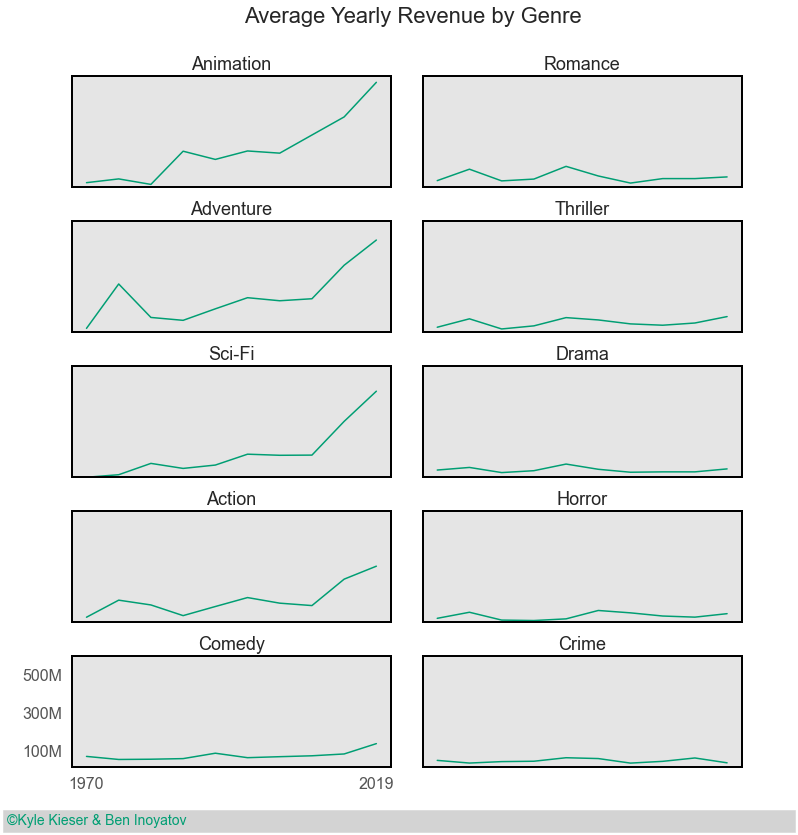

In [25]:
# graphing and formatting
style.use('ggplot')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (12,8))#, frameon = True, edgecolor = 'black', linewidth = 10)

for j in range(2):
    for i in range(5):
        bud_rev_genre_by_year_10bins_df[keep3[(i + 5*j)]].plot(ax=axes[i,j], color = [[0,158/255,115/255]]);
        axes[i,j].set_title(keep3[(i + 5*j)], fontsize = 18)
        axes[i,j].set_ylim([1e7,6e8])
        axes[i,j].set_xticks([0,9])
        axes[i,j].set_yticks(np.linspace(1e8,5e8, num = 3))
        axes[i,j].grid(False)
        if (i + 5*j) != 4:
            axes[i,j].set_xlabel('')
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])
        else:
            axes[i,j].set_xlabel('', fontsize = 18)
            axes[i,j].set_xticklabels([1970,2019], fontsize = 16)
            axes[i,j].set_yticklabels(['100M','300M','500M'], fontsize = 16)
        for location in ['left','right', 'top', 'bottom']:
            axes[i][j].spines[location].set_color('black')
            axes[i][j].spines[location].set_linewidth(2)
fig.subplots_adjust(left=0.125, bottom=0.0, right=0.9, top=1.2, wspace=0.1, hspace=0.3)
fig.suptitle('Average Yearly Revenue by Genre',x = 0.52, y = 1.32, fontsize = 22)
fig.text(x = 0.05, y = -0.1,
    s = '©Kyle Kieser & Ben Inoyatov                                                                                                                                                            ',
         fontsize = 14, color = [0,158/255,115/255], backgroundcolor = 'lightgrey');
# fig.savefig('graph_pngs/avg_year_rev_genre.png', facecolor = 'white', bbox_inches = 'tight')

### Here we can see that the genres we are interested in are trending really well too.  You can really see that the average yearly gross of animation, adventure and sci-fi have taken off over last decade or so. This is great.

# Best Time of the Year to Premier Movies

In [11]:
# load data from webscraping box office mojo
movie_longevity_df = pd.read_csv('movie_longevity_df.csv')

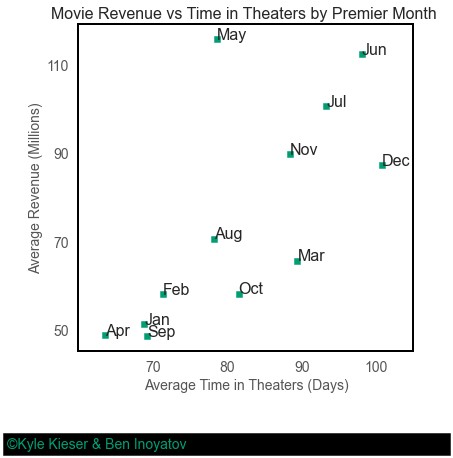

In [12]:
# graphing and formatting
fig, ax = plt.subplots(figsize = (6,6))
movie_longevity_df.plot(kind = 'scatter', y = 'average_revenue', x = 'average_days_in_theaters', s = 40, marker = 's', c = [[0,158/255,115/255]], ax = ax)
for i in range(movie_longevity_df.shape[0]):
    ax.annotate(movie_longevity_df['premier_month'].tolist()[i],
                (movie_longevity_df['average_days_in_theaters'].tolist()[i], movie_longevity_df['average_revenue'].tolist()[i]),
               fontsize = 16)
ax.set_title('Movie Revenue vs Time in Theaters by Premier Month ', fontsize = 16)
ax.set_xlabel('Average Time in Theaters (Days)', fontsize = 14)
ax.set_ylabel('Average Revenue (Millions)', fontsize = 14)
ax.grid(False)
ax.set_facecolor('white')
ax.set_xlim((60,105))
ax.set_xticks(np.linspace(70, 100, num = 4))
ax.set_yticks(np.linspace(0.5e8, 1.1e8, num = 4))
ax.set_yticklabels([50, 70, 90, 110])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
for i in ['left','right', 'top', 'bottom']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
fig.text(x = -0.04, y = -0.1,
    s = '©Kyle Kieser & Ben Inoyatov                                                                   ',
         fontsize = 14, color = [0,158/255,115/255], backgroundcolor = 'black');
# fig.savefig('graph_pngs/movie_longevity.png', facecolor = 'white', bbox_inches = 'tight')

### From this scatter plot we can see that months around holidays perform better in general. Being a new studio we want to give our movie the best chance of success. So, the longer the movie is in the theater the better. This being said we should probably release in June or July. May looks like the month for summer blockbusters. They release at the beginning of summer, make a lot of money and get out quick. It's probably not best to try to compete with other blockbusters at the moment. June and July should be our target. 